In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Data Preprocessing
### Follow step by Step 
### applicable for all ML Model
### check for all dataset

In [2]:
# Part1- Handing Missing Value
# part2 - Handling Encoding Data
            #- Label Encoder
            # - One Hot Encoder
            # -Dummy Variable
# part3 - Handling Outlier
# Part4 - Feature Scaling
            #- Normalization 
            #- Standarisation
# Part5 - Handling Imbalance Dataset(applicable only for Classification)
    

In [3]:
## Handling missing Value 
# Rule 1: By default if 25% of the data is missing, ignore than variable


# Rule 2 : if we have less than 25% data missed
    # step 1) check data variable (whether it is number or charactor/object)
    
    # step 2 ) it that is object/charactor -
    # approach  - imputation 
        # Charactor - "MODE" (Most frequent occurance)
    
    # step 3 - it that data is numeric
    # approach - number - first check outlier 
        # a) if outlier found, we will use "Median"
        # b) if there is no outlier found, we will use "Mean"

In [4]:
import os # os - operating system
os.getcwd() # get current working directory

'C:\\Users\\91994\\Documents\\Preeti Files\\Sundaram ML'

In [5]:
data = pd.read_csv('titanic.csv')

In [6]:
data.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D


In [7]:
# check missing value
data.isnull().any()

Pclass      False
Gender      False
Age          True
SibSp       False
ParCh       False
Fare         True
Embarked     True
Status      False
dtype: bool

In [8]:
# Checking Missing value 
data.isnull().sum()

Pclass        0
Gender        0
Age         263
SibSp         0
ParCh         0
Fare          1
Embarked      2
Status        0
dtype: int64

In [9]:
# Finding missing value percentage
data.isnull().sum()/len(data)*100

Pclass       0.000000
Gender       0.000000
Age         20.091673
SibSp        0.000000
ParCh        0.000000
Fare         0.076394
Embarked     0.152788
Status       0.000000
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [11]:
data.describe(include='all')

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
count,1309.000000,1309,1046.000000,1309.000000,1309.000000,1308.000000,1307,1309
unique,NaN,2,NaN,NaN,NaN,NaN,3,2
top,NaN,Male,NaN,NaN,NaN,NaN,Southampton,D
freq,NaN,843,NaN,NaN,NaN,NaN,914,809
mean,2.294882,NaN,29.881166,0.498854,0.385027,33.296261,NaN,NaN
std,0.837836,NaN,14.413435,1.041658,0.865560,51.758691,NaN,NaN
min,1.000000,NaN,0.200000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.000000,NaN,21.000000,0.000000,0.000000,7.900000,NaN,NaN
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.450000,NaN,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.280000,NaN,NaN


In [12]:
# Age and Fare are Number
# Embarked is character

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Age'>

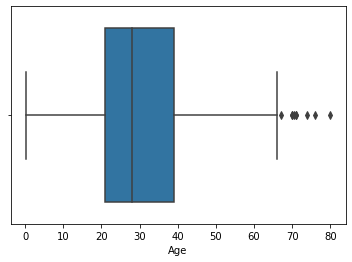

In [13]:
sns.boxplot(x = 'Age', data = data, orient= "v")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Fare'>

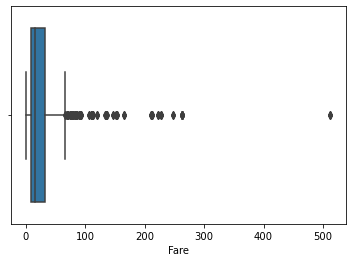

In [14]:
sns.boxplot(x = 'Fare', data = data, orient= "v")

In [15]:
# Age - outlier present - use median
# Fare - outlier present - use median

In [16]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [17]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [18]:
# Embarked is character- we will use mode to impute

In [19]:
data['Embarked'] = data['Embarked'].fillna('Southampton')

In [20]:
data.isnull().sum()

Pclass      0
Gender      0
Age         0
SibSp       0
ParCh       0
Fare        0
Embarked    0
Status      0
dtype: int64

In [21]:
data['Embarked'].value_counts()

Southampton    916
Cherbourg      270
Queenstown     123
Name: Embarked, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [23]:
data['Gender'] = data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes
data = pd.get_dummies(data, columns = ['Gender']) # mention only column name in list 

In [24]:
data['Embarked'] = data['Embarked'].astype('category')
data['Embarked'] = data['Embarked'].cat.codes
data = pd.get_dummies(data, columns = ['Embarked']) # mention only column name in list 

In [25]:
data['Status'] = data['Status'].astype('category')
data['Status'] = data['Status'].cat.codes
data = pd.get_dummies(data, columns = ['Status'])# mention only column name in list 

In [26]:
data

,Pclass,Age,SibSp,ParCh,Fare,Gender_0,Gender_1,Embarked_0,Embarked_1,Embarked_2,Status_0,Status_1
0,1,29.0,0,0,211.34,1,0,0,0,1,0,1
1,1,0.9,1,2,151.55,0,1,0,0,1,0,1
2,1,2.0,1,2,151.55,1,0,0,0,1,1,0
3,1,30.0,1,2,151.55,0,1,0,0,1,1,0
4,1,25.0,1,2,151.55,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,14.5,1,0,14.45,1,0,1,0,0,1,0
1305,3,28.0,1,0,14.45,1,0,1,0,0,1,0
1306,3,26.5,0,0,7.23,0,1,1,0,0,1,0
1307,3,27.0,0,0,7.23,0,1,1,0,0,1,0


In [39]:
data = data.drop(columns = ['Gender_0','Embarked_0','Status_0' ], axis = 1)

In [40]:
data

,Pclass,Age,SibSp,ParCh,Fare,Gender_1,Embarked_1,Embarked_2,Status_1
0,1,29.0,0,0,211.34,0,0,1,1
1,1,0.9,1,2,151.55,1,0,1,1
2,1,2.0,1,2,151.55,0,0,1,0
3,1,30.0,1,2,151.55,1,0,1,0
4,1,25.0,1,2,151.55,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1304,3,14.5,1,0,14.45,0,0,0,0
1305,3,28.0,1,0,14.45,0,0,0,0
1306,3,26.5,0,0,7.23,1,0,0,0
1307,3,27.0,0,0,7.23,1,0,0,0


In [41]:
data_fs = data.values  # Convering data in array to apply matematical operations

In [42]:
data_fs

array([[ 1. , 29. ,  0. , ...,  0. ,  1. ,  1. ],
       [ 1. ,  0.9,  1. , ...,  0. ,  1. ,  1. ],
       [ 1. ,  2. ,  1. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 26.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 3. , 27. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 3. , 29. ,  0. , ...,  0. ,  1. ,  0. ]])

In [ ]:
# Standardisation

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
data_fs_std = sc.fit_transform(data_fs)

In [47]:
data_fs_std

array([[-1.54609786, -0.03900763, -0.47908676, ..., -0.32204029,
         0.65501092,  1.27200629],
       [-1.54609786, -2.21725853,  0.48128777, ..., -0.32204029,
         0.65501092,  1.27200629],
       [-1.54609786, -2.13198892,  0.48128777, ..., -0.32204029,
         0.65501092, -0.78615963],
       ...,
       [ 0.84191642, -0.2328022 , -0.47908676, ..., -0.32204029,
        -1.52669211, -0.78615963],
       [ 0.84191642, -0.19404328, -0.47908676, ..., -0.32204029,
        -1.52669211, -0.78615963],
       [ 0.84191642, -0.03900763, -0.47908676, ..., -0.32204029,
         0.65501092, -0.78615963]])

In [56]:
pd.DataFrame(data_fs_std)

,0,1,2,3,4,5,6,7,8
0,-1.546098,-0.039008,-0.479087,-0.445000,3.442616,-1.344995,-0.32204,0.655011,1.272006
1,-1.546098,-2.217259,0.481288,1.866526,2.286623,0.743497,-0.32204,0.655011,1.272006
2,-1.546098,-2.131989,0.481288,1.866526,2.286623,-1.344995,-0.32204,0.655011,-0.786160
3,-1.546098,0.038510,0.481288,1.866526,2.286623,0.743497,-0.32204,0.655011,-0.786160
4,-1.546098,-0.349079,0.481288,1.866526,2.286623,-1.344995,-0.32204,0.655011,-0.786160
...,...,...,...,...,...,...,...,...,...
1304,0.841916,-1.163016,0.481288,-0.445000,-0.364099,-1.344995,-0.32204,-1.526692,-0.786160
1305,0.841916,-0.116525,0.481288,-0.445000,-0.364099,-1.344995,-0.32204,-1.526692,-0.786160
1306,0.841916,-0.232802,-0.479087,-0.445000,-0.503693,0.743497,-0.32204,-1.526692,-0.786160
1307,0.841916,-0.194043,-0.479087,-0.445000,-0.503693,0.743497,-0.32204,-1.526692,-0.786160


In [ ]:
# Normalisation

In [49]:
data_nr = data.values
data_nr

array([[ 1. , 29. ,  0. , ...,  0. ,  1. ,  1. ],
       [ 1. ,  0.9,  1. , ...,  0. ,  1. ,  1. ],
       [ 1. ,  2. ,  1. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 26.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 3. , 27. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 3. , 29. ,  0. , ...,  0. ,  1. ,  0. ]])

In [51]:
from sklearn.preprocessing import Normalizer

In [52]:
nr =  Normalizer()

In [53]:
data_fs_nr =nr.fit_transform(data_fs)

In [54]:
data_fs_nr

array([[0.00468763, 0.13594126, 0.        , ..., 0.        , 0.00468763,
        0.00468763],
       [0.00659707, 0.00593737, 0.00659707, ..., 0.        , 0.00659707,
        0.00659707],
       [0.0065969 , 0.01319381, 0.0065969 , ..., 0.        , 0.0065969 ,
        0.        ],
       ...,
       [0.10849907, 0.95840843, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10664932, 0.95984392, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09922606, 0.95918521, 0.        , ..., 0.        , 0.03307535,
        0.        ]])

In [55]:
pd.DataFrame(data_fs_nr)

,0,1,2,3,4,5,6,7,8
0,0.004688,0.135941,0.000000,0.000000,0.990684,0.000000,0.0,0.004688,0.004688
1,0.006597,0.005937,0.006597,0.013194,0.999787,0.006597,0.0,0.006597,0.006597
2,0.006597,0.013194,0.006597,0.013194,0.999761,0.000000,0.0,0.006597,0.000000
3,0.006472,0.194154,0.006472,0.012944,0.980800,0.006472,0.0,0.006472,0.000000
4,0.006510,0.162738,0.006510,0.013019,0.986519,0.000000,0.0,0.006510,0.000000
...,...,...,...,...,...,...,...,...,...
1304,0.144833,0.700024,0.048278,0.000000,0.697610,0.000000,0.0,0.000000,0.000000
1305,0.094736,0.884200,0.031579,0.000000,0.456310,0.000000,0.0,0.000000,0.000000
1306,0.108499,0.958408,0.000000,0.000000,0.261483,0.036166,0.0,0.000000,0.000000
1307,0.106649,0.959844,0.000000,0.000000,0.257025,0.035550,0.0,0.000000,0.000000


In [27]:
my_data = sns.load_dataset('titanic')

In [28]:
my_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
my_data = my_data.drop(['deck'], axis = 1)

<AxesSubplot:xlabel='age'>

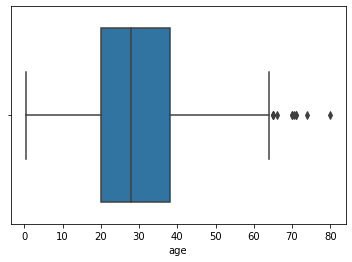

In [30]:
sns.boxplot(x = 'age', data = my_data)

In [31]:
my_data['age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

In [32]:
my_data['age'] = my_data['age'].fillna(my_data['age'].median())


In [33]:
my_data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [34]:
my_data['embarked'] = my_data['embarked'].fillna("S")

In [35]:
my_data['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [36]:
my_data['embark_town'] = my_data['embark_town'].fillna("Southampton")

In [37]:
my_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Age         1309 non-null   float64
 2   SibSp       1309 non-null   int64  
 3   ParCh       1309 non-null   int64  
 4   Fare        1309 non-null   float64
 5   Gender_0    1309 non-null   uint8  
 6   Gender_1    1309 non-null   uint8  
 7   Embarked_0  1309 non-null   uint8  
 8   Embarked_1  1309 non-null   uint8  
 9   Embarked_2  1309 non-null   uint8  
 10  Status_0    1309 non-null   uint8  
 11  Status_1    1309 non-null   uint8  
dtypes: float64(2), int64(3), uint8(7)
memory usage: 60.2 KB
